<a href="https://colab.research.google.com/github/Thasneem-vazim/Project-Code/blob/main/Without_using_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.express as px
np.random.seed(13)
file=pd.read_csv("/content/Copy of Survey (Responses) - Form Responses 1 (2).csv")
x=file[["1) Sadness","2) Discouragement","3) Low self-esteem","4) Inferiority","5) Guilt","6) Indecisiveness","7) Irritability","8) Loss of interest in life","9) Loss of motivation","10) Poor self-image","11) Appetite changes","12) Sleep changes","13) Loss of positivity","14) Hypochondriasis","15) Suicidal impulses"]]
y=file["Class"]

In [ ]:
print(file.shape)

(206, 22)


In [ ]:
file.describe()

,1) Sadness,2) Discouragement,3) Low self-esteem,4) Inferiority,5) Guilt,6) Indecisiveness,7) Irritability,8) Loss of interest in life,9) Loss of motivation,10) Poor self-image,11) Appetite changes,12) Sleep changes,13) Loss of positivity,14) Hypochondriasis,15) Suicidal impulses,Total
count,206.000000,206.000000,206.000000,206.000000,206.00000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,1.368932,1.092233,1.024272,1.242718,1.26699,1.412621,1.223301,0.995146,1.330097,1.194175,1.092233,1.218447,1.014563,1.097087,0.747573,17.300971
std,0.632306,1.000604,0.975001,0.941882,0.95334,0.877711,0.936335,0.955077,0.909445,1.045858,0.975924,1.029255,0.944706,0.872502,0.891351,8.785615
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000
75%,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,23.000000
max,2.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,44.000000


In [ ]:
ig = px.pie(pd.DataFrame(file['Gender'].value_counts()), 
                            values='Gender', 
                            names=['Male','Female'],
                            title='Gender Count',
                            color='Gender',
                            color_discrete_map={'Male':'violet', 'Female':'pink'}
                            )
ig.show()

Text(0, 0.5, 'Frequency')

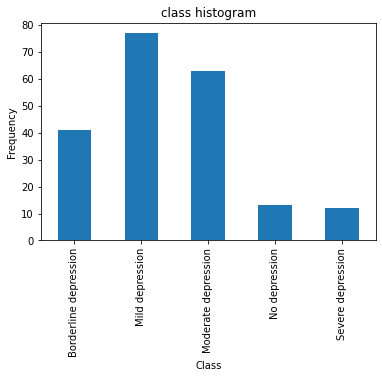

In [ ]:
count_classes = pd.value_counts(file['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
prediction=regressor.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  54.761904761904766


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.50      0.50      0.50        16
           2       0.62      0.62      0.62        13
           3       0.50      0.33      0.40         3
           4       0.67      1.00      0.80         2

    accuracy                           0.55        42
   macro avg       0.56      0.59      0.56        42
weighted avg       0.54      0.55      0.54        42



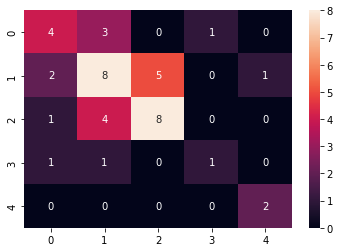

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y6_predict_test=regressor.predict(x_test)
cm1=confusion_matrix(y_test,y6_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y6_predict_test))


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.88      0.88      0.88        16
           2       0.86      0.92      0.89        13
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         2

    accuracy                           0.86        42
   macro avg       0.90      0.80      0.82        42
weighted avg       0.87      0.86      0.85        42



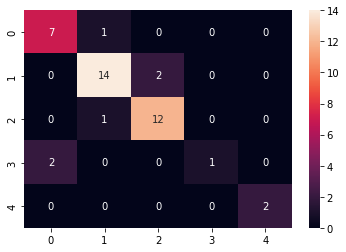

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y1_predict_test=SVM.predict(x_test)
cm1=confusion_matrix(y_test,y1_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y1_predict_test))


In [ ]:
prediction=SVM.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  85.71428571428571


In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(x_train,y_train)

MultinomialNB()

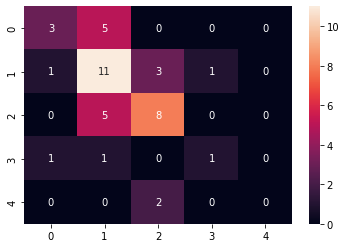

In [ ]:
y2_predict_test=NB.predict(x_test)
cm2=confusion_matrix(y_test,y2_predict_test)
sns.heatmap(cm2,annot=True)

In [ ]:
print(classification_report(y_test,y2_predict_test))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.50      0.69      0.58        16
           2       0.62      0.62      0.62        13
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         2

    accuracy                           0.55        42
   macro avg       0.44      0.40      0.41        42
weighted avg       0.53      0.55      0.53        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)


BernoulliNB()

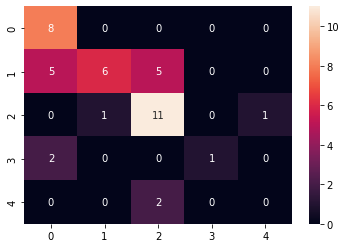

In [ ]:
y3_predict_test=BNBmodel.predict(x_test)
cm1=confusion_matrix(y_test,y3_predict_test)
sns.heatmap(cm1,annot=True)

In [ ]:
print(classification_report(y_test,y3_predict_test))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       0.86      0.38      0.52        16
           2       0.61      0.85      0.71        13
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         2

    accuracy                           0.62        42
   macro avg       0.60      0.51      0.49        42
weighted avg       0.69      0.62      0.59        42



In [ ]:
prediction=BNBmodel.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  61.904761904761905


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)

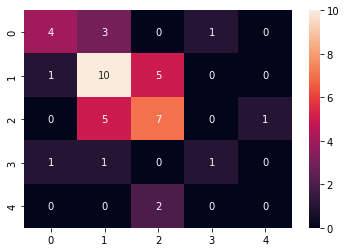

In [ ]:
y4_predict_test=DT.predict(x_test)
cm4=confusion_matrix(y_test,y4_predict_test)
sns.heatmap(cm4,annot=True)

In [ ]:
print(classification_report(y_test,y4_predict_test))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.53      0.62      0.57        16
           2       0.50      0.54      0.52        13
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         2

    accuracy                           0.52        42
   macro avg       0.44      0.40      0.41        42
weighted avg       0.52      0.52      0.52        42



In [ ]:
prediction=DT.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  52.38095238095239


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
prediction=RF.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)


Accuracy =  73.80952380952381


              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.68      0.81      0.74        16
           2       0.91      0.77      0.83        13
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         2

    accuracy                           0.74        42
   macro avg       0.83      0.71      0.73        42
weighted avg       0.77      0.74      0.74        42



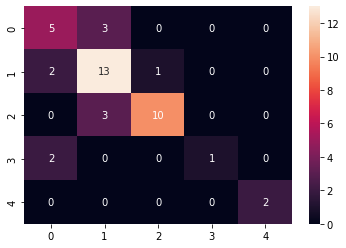

In [ ]:
y5_predict_test=RF.predict(x_test)
cm4=confusion_matrix(y_test,y5_predict_test)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y5_predict_test))

In [ ]:
prediction=RF.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  73.80952380952381


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
params = {
 'objective':'binary:logistic',
 'max_depth': 4, 'min_child_weight': 12, 'gamma': 0.3, 'subsample': 0.6,
 'colsample_bytree': 0.6, 'scale_pos_weight': 1,
 'alpha': 0.05,
 'learning_rate': 0.03,
 'n_estimators':1484,'seed': 27
 }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train,y_train)

XGBClassifier(alpha=0.05, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03,
              max_depth=4, min_child_weight=12, n_estimators=1484,
              objective='multi:softprob', seed=27, subsample=0.6)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.52      0.69      0.59        16
           2       0.62      0.62      0.62        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.55        42
   macro avg       0.33      0.36      0.34        42
weighted avg       0.49      0.55      0.51        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



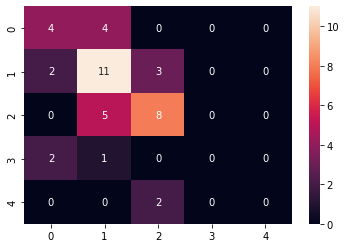

In [ ]:
yxg_pred=xgb_clf.predict(x_test)
cm4=confusion_matrix(y_test,yxg_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,yxg_pred))

In [ ]:
print(classification_report(y_test,yxg_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.52      0.69      0.59        16
           2       0.62      0.62      0.62        13
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.55        42
   macro avg       0.33      0.36      0.34        42
weighted avg       0.49      0.55      0.51        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
prediction=xgb_clf.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  54.761904761904766


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.69      0.69      0.69        16
           2       1.00      0.62      0.76        13
           3       1.00      0.33      0.50         3
           4       0.67      1.00      0.80         2

    accuracy                           0.69        42
   macro avg       0.77      0.70      0.68        42
weighted avg       0.77      0.69      0.69        42



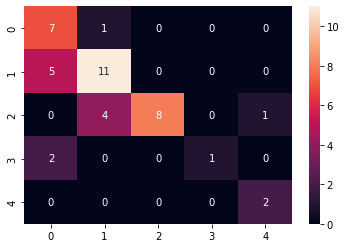

In [ ]:
y6_pred=knn.predict(x_test)
cm4=confusion_matrix(y_test,y6_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y6_pred))

In [ ]:
print(classification_report(y_test,y6_pred))

              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           1       0.69      0.69      0.69        16
           2       1.00      0.62      0.76        13
           3       1.00      0.33      0.50         3
           4       0.67      1.00      0.80         2

    accuracy                           0.69        42
   macro avg       0.77      0.70      0.68        42
weighted avg       0.77      0.69      0.69        42



In [ ]:
prediction=knn.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  69.04761904761905
